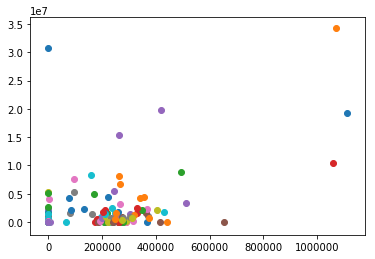

no predictions object named pred found, no clusters to plot


In [66]:
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""




import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, f3 in finance_features:
    #plt.scatter( f1, f2 )
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred




### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters2.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

    


In [59]:
data_dict

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'

In [60]:
data_dict.get()

TypeError: get expected at least 1 arguments, got 0

In [63]:
values = []
for i in data_dict:
    if data_dict[i]["exercised_stock_options"] != 'NaN':
        values.append(data_dict[i]["exercised_stock_options"])
    
#values[values == 'NaN'] = '0'
print(values)
print(min(values))
print(max(values))


[6680544, 4890344, 651850, 5538001, 493489, 1104054, 5210569, 880290, 2282768, 765313, 2218275, 372205, 1056320, 185063, 1030329, 4346544, 81042, 3285, 1441898, 1465734, 1635238, 98718, 601438, 850477, 664375, 4158995, 1624396, 2027865, 436515, 4046157, 371750, 607837, 1835558, 1624396, 412878, 17378, 3282960, 1623010, 2291113, 1362375, 139130, 2549361, 34348384, 1637034, 757301, 83237, 506765, 187500, 759557, 1753766, 608750, 9803, 664461, 59539, 7509039, 1599641, 953136, 1451869, 4452476, 343434, 19794175, 850010, 117551, 5266578, 19250000, 1426469, 886231, 28798, 2022048, 1324578, 1668260, 1297049, 5127155, 1729541, 281073, 431750, 257817, 754966, 4160672, 8191755, 2604490, 825464, 192758, 400478, 636246, 8308552, 30766064, 1550019, 8831913, 10433518, 15364167, 176378, 940257, 671737, 2165172, 591250, 2070306, 2542813, 3181250, 765920, 384728]
3285
34348384


In [65]:

s = []
for i in data_dict:
    if data_dict[i]["salary"] != 'NaN':
        s.append(data_dict[i]["salary"])
    
#values[values == 'NaN'] = '0'
print(s)
print(min(s))
print(max(s))

[365788, 267102, 170941, 243293, 267093, 370448, 197091, 130724, 288589, 248546, 257486, 288542, 251654, 288558, 63744, 357091, 271442, 304110, 187922, 213625, 249201, 231330, 182245, 211788, 224305, 273746, 339288, 216582, 210500, 272880, 477, 269076, 428780, 211844, 206121, 174246, 510364, 365038, 365163, 162779, 236457, 1072321, 261516, 329078, 184899, 192008, 263413, 262663, 374125, 278601, 199157, 96840, 80818, 213999, 210692, 222093, 440698, 240189, 420636, 275101, 314288, 94941, 239502, 1111258, 6615, 655037, 404338, 259996, 317543, 201955, 248146, 76399, 262788, 261809, 248017, 229284, 231946, 221003, 158403, 250100, 492375, 1060932, 261879, 239671, 304588, 309946, 85274, 247338, 349487, 330546, 415189, 265214, 278601, 274975]
477
1111258
